# Pandas, Matplotlib and Scikit Learn Overview

## What is pandas?
Python Library for Data manipulation and Analysis
 - Provide expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.
 - Aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.
 - Built on top of NumPy and is intended to integrate well within a scientific computing.
 - Inspired by R and Excel.
 
Pandas is well suited for many different kinds of data:
- **Tabular data** with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) **time series data**.
- **Arbitrary matrix data** (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets (can be unlabeled)

Two primary data structures
- **Series** (1-dimensional) – Similar to a column in Excel’s spreadsheet
- **Data Frame** (2-dimensional) – Similar to R’s data frame

A few of the things that Pandas does well
- Easy handling of **missing data** (represented as NaN)
- Automatic and explicit **data alignment**
- Read and Analyze **CSV** , Excel Sheets Easily
- Operations
- Filtering, Group By, Merging, Slicing and Dicing, Pivoting and Reshaping
- Plotting graphs

Pandas is very useful for interactive data exploration at the data preparation stage of a project

The offical guide to Pandas can be found [here](http://pandas-docs.github.io/pandas-docs-travis/10min.html)

## Pandas Objects

In [1]:
import pandas as pd
import numpy as np

**Series** like a column in a spreadsheet.

In [2]:
s = pd.Series([1,3,np.nan,'string'])
s

0         1
1         3
2       NaN
3    string
dtype: object

**DataFrame** like a spreadsheet – a dictionary of Series objects

In [3]:
data = [['ABC', -3.5, 0.01], ['ABC', -2.3, 0.12], ['DEF', 1.8, 0.03],
['DEF', 3.7, 0.01], ['GHI', 0.04, 0.43], ['GHI', -0.1, 0.67]]

df = pd.DataFrame(data, columns=['gene', 'log2FC', 'pval'])

df

,gene,log2FC,pval
0,ABC,-3.50,0.01
1,ABC,-2.30,0.12
2,DEF,1.80,0.03
3,DEF,3.70,0.01
4,GHI,0.04,0.43
5,GHI,-0.10,0.67


### Viewing Data

Display the top and bottom rows of the frame

In [4]:
df.head()

,gene,log2FC,pval
0,ABC,-3.50,0.01
1,ABC,-2.30,0.12
2,DEF,1.80,0.03
3,DEF,3.70,0.01
4,GHI,0.04,0.43


In [5]:
df.tail()

,gene,log2FC,pval
1,ABC,-2.30,0.12
2,DEF,1.80,0.03
3,DEF,3.70,0.01
4,GHI,0.04,0.43
5,GHI,-0.10,0.67


In [6]:
df.tail(2)

,gene,log2FC,pval
4,GHI,0.04,0.43
5,GHI,-0.10,0.67


Display the index, clumns and the underlying numpy data

In [7]:
df['log2FC'] # df.log2FC

0   -3.50
1   -2.30
2    1.80
3    3.70
4    0.04
5   -0.10
Name: log2FC, dtype: float64

In [8]:
df.columns

Index(['gene', 'log2FC', 'pval'], dtype='object')

In [9]:
df.values

array([['ABC', -3.5, 0.01],
       ['ABC', -2.3, 0.12],
       ['DEF', 1.8, 0.03],
       ['DEF', 3.7, 0.01],
       ['GHI', 0.04, 0.43],
       ['GHI', -0.1, 0.67]], dtype=object)

### Summarizations
`describe` shows a quick statistic
summary of your data

In [10]:
df.describe()

,log2FC,pval
count,6.000000,6.000000
mean,-0.060000,0.211667
std,2.625262,0.275856
min,-3.500000,0.010000
25%,-1.750000,0.015000
50%,-0.030000,0.075000
75%,1.360000,0.352500
max,3.700000,0.670000


`info` provies a concise summar of a DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gene    6 non-null      object 
 1   log2FC  6 non-null      float64
 2   pval    6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 272.0+ bytes


## Input and Output
How do you get data into and out of Pandas as spreadsheets?
 - Pandas can work with XLS or XLSX files.
 - Can also work with CSV (comma separated values) file
 - CSV stores plain text in a tabular form
 - CSV files may have a header
 - You can use a variety of different field delimiters (rather than a ‘comma’). Check which delimiter your file is using before import!
 
__Import to Pandas__  
 > `df = pd.read_csv('data.csv', sep='\t', header=0)`

For Excel files, it's the same thing but with read_excel

__Export to text file__  
 > `df.to_csv('data.csv', sep='\t', header=True, index=False)`
 
The values of header and index depend on if you want to print the column and/or row names

# Case Study – Analyzing Titanic Passengers Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os


#set your working_dir
working_dir = os.path.join(os.getcwd(), 'titanic')

url_base = 'https://github.com/Currie32/Titanic-Kaggle-Competition/raw/master/{}.csv'
train_url = url_base.format('train')
test_url = url_base.format('test')

# For .read_csv, always use header=0 when you know row 0 is the header row
train = pd.read_csv(train_url, header=0)
test = pd.read_csv(test_url, header=0)
# You can also load a csv file from a local file rather than a URL


In [13]:
# Display the top elements from the table
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### VARIABLE DESCRIPTIONS:
survival - 0 = No; 1 = Yes  
pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
sibsp - Number of Siblings/Spouses Aboard  
parch - Number of Parents/Children Aboard  
ticket - Ticket Number  
fare - Passenger Fare  
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Understanding the data...

In [14]:
train.shape

(891, 12)

In [15]:
train.Pclass.size

891

In [16]:
# Count values of 'Survived'
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# Calculate the mean fare price
train.Fare.mean()

32.204207968574636

In [18]:
# General statistics of the dataframe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Selection examples

In [19]:
# Selection is very similar to standard Python selection
df1 = train[['Name', 'Sex', 'Age']]
df1.head()

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


In [20]:
df1[10:15]

,Name,Sex,Age
10,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,"Bonnell, Miss. Elizabeth",female,58.0
12,"Saundercock, Mr. William Henry",male,20.0
13,"Andersson, Mr. Anders Johan",male,39.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0


In [21]:
df1[-4:-10:-2]

,Name,Sex,Age
887,"Graham, Miss. Margaret Edith",female,19.0
885,"Rice, Mrs. William (Margaret Norton)",female,39.0
883,"Banfield, Mr. Frederick James",male,28.0


### Filtering Examples

In [22]:
# Filtering allows you to create masks given some conditions
df1.Sex == 'male' 

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [23]:
df1[(df1.Age > 35) & (df1.Sex == 'male')]

,Name,Sex,Age
6,"McCarthy, Mr. Timothy J",male,54.0
13,"Andersson, Mr. Anders Johan",male,39.0
30,"Uruchurtu, Don. Manuel E",male,40.0
33,"Wheadon, Mr. Edward H",male,66.0
35,"Holverson, Mr. Alexander Oskar",male,42.0
...,...,...,...
845,"Abbing, Mr. Anthony",male,42.0
851,"Svensson, Mr. Johan",male,74.0
857,"Daly, Mr. Peter Denis",male,51.0
860,"Hansen, Mr. Claus Peter",male,41.0


### Creating new columns/Data
We may be intereseted in creating new features that are derived from other columns.
In this example we create a 'prefix' (or passanger's title).

In [24]:
import re

prefix = []
for name in train.Name:
    try:
        m = re.search(', M[a-z]+.', name) # search for ', M' followed by 
                                          #     1 or more lowercase letters and a '.'
        prefix.append(m.group(0).strip(","))
    except:
        prefix.append("")

In [25]:
train['Prefix'] = prefix
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


## Other operations
Pandas allows you to aggregate and display different views of your data.

In [26]:
df2 = train.groupby(['Pclass', 'Sex']).Fare.agg(np.mean)
df2

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

In [27]:
pd.pivot_table(train, index=['Pclass'], values=['Survived'], aggfunc='count')

,Survived
Pclass,
1,216
2,184
3,491


In [28]:
pd.pivot_table(train, index=['Pclass', 'Sex'], values=['Age', 'Fare', 'Survived'], aggfunc='mean')

Age        Fare  Survived
Pclass Sex                                    
1      female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
2      female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
3      female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

## Plotting
Basic plotting in pandas is pretty straightforward

<AxesSubplot:xlabel='Pclass,Sex'>

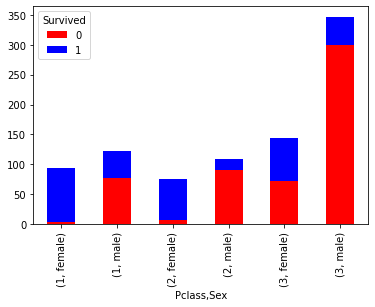

In [29]:
new_plot = pd.crosstab([train.Pclass, train.Sex], train.Survived)
new_plot.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

<AxesSubplot:>

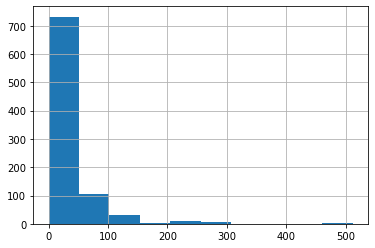

In [30]:
train.Fare.hist()

## Concluding Remarks

* DataFrame cannot be used directly by Numpy  
It needs to transform DataFrame to Numpy-array:  
  > `pandas.DataFrame.as_matrix()`

* [Categorical type](http://pandas.pydata.org/pandas-docs/stable/categorical.html)  
 * Similar to ‘Factor’ in R but can preserve an order.

 * CSV file – Categorical variables are set to type ‘object’
Need to transform to categorical type
 * Converting categorical to numeric (usually int) type
 
 > * `Categorical.rename_categories()`  
    Convert categorical variable into dummy/indicator variables
  
 > * **`pandas.get_dummies()`**  
    Convert categorical variable into int variable

# What is Matplotlib

A 2D plotting library which produces publication quality figures.
 - Can be used in python scripts, the python and IPython shell, web application servers, and more …
 - Can be used to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc.
 - For simple plotting, pyplot provides a MATLAB-like interface 
 - For power users, a full control via OO interface or via a set of functions

There are several Matplotlib add-on toolkits
 - Projection and mapping toolkits [basemap](http://matplotlib.org/basemap/) and [cartopy](http://scitools.org.uk/cartopy/).
 - Interactive plots in web browsers using [Bokeh](http://bokeh.pydata.org/en/latest/).
 - Higher level interface with updated visualizations [Seaborn](http://seaborn.pydata.org/index.html).

Matplotlib is available at [www.matplotlib.org](www.matplotlib.org)

## Line Plots

### plot against indices

In [31]:
import matplotlib.pyplot as plt
import numpy as np

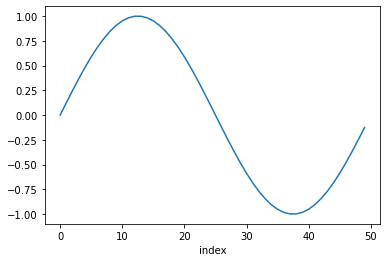

In [32]:
x = np.arange(50) * 2*np.pi / 50
y = np.sin(x)
plt.plot(y)
plt.xlabel('index')
plt.show()

## multiple lines

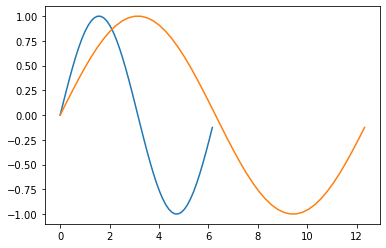

In [33]:
x2 = np.arange(50) * 2*np.pi / 25
y2 = np.sin(x)
plt.plot(x, y, x2, y2)

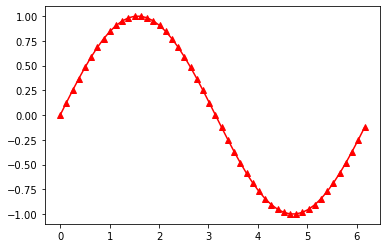

In [34]:
plt.plot(x, np.sin(x), 'r-^')

(0.0, 7.0, -2.0, 2.0)

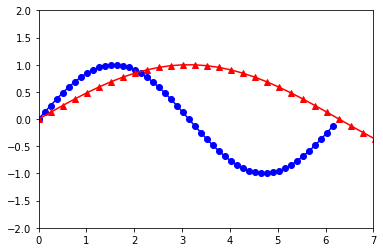

In [35]:
plt.plot(x, y, 'b-o', x2, y2, 'r-^')
plt.axis([0, 7, -2, 2])

## Scatter plots

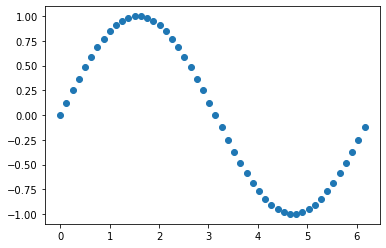

In [36]:
plt.scatter(x, y)

## colormapped scatter

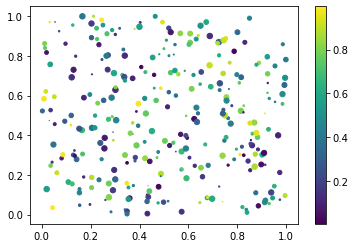

In [37]:
x_rand = np.random.rand(300)
y_rand = np.random.rand(300)
size = np.random.rand(300)*30
color = np.random.rand(300)
plt.scatter(x_rand, y_rand, size, color)
plt.colorbar()

## Bar plots

<BarContainer object of 50 artists>

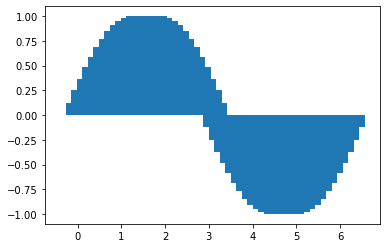

In [38]:
plt.bar(x, y)

<BarContainer object of 50 artists>

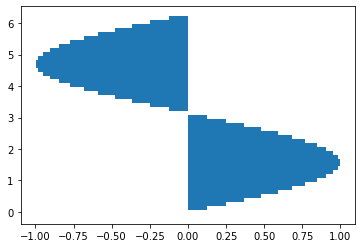

In [39]:
plt.barh(x, y, height=x[1]-x[0])

## Histogram

(array([  4.,  20.,  65., 147., 248., 249., 169.,  71.,  22.,   5.]),
 array([-3.44487481, -2.77542495, -2.10597509, -1.43652523, -0.76707538,
        -0.09762552,  0.57182434,  1.2412742 ,  1.91072406,  2.58017392,
         3.24962378]),
 <BarContainer object of 10 artists>)

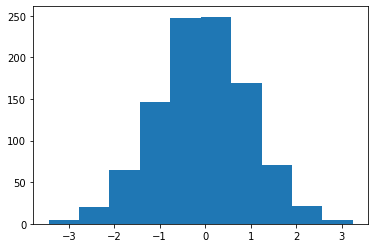

In [40]:
plt.hist(np.random.randn(1000))

(array([ 1.,  1.,  4.,  2.,  5.,  9., 13., 18., 25., 41., 49., 61., 72.,
        80., 71., 92., 69., 59., 65., 67., 49., 34., 36., 17., 19., 20.,
         6.,  8.,  3.,  4.]),
 array([-3.06315261, -2.87027234, -2.67739208, -2.48451181, -2.29163154,
        -2.09875128, -1.90587101, -1.71299074, -1.52011048, -1.32723021,
        -1.13434994, -0.94146968, -0.74858941, -0.55570914, -0.36282888,
        -0.16994861,  0.02293166,  0.21581192,  0.40869219,  0.60157246,
         0.79445272,  0.98733299,  1.18021326,  1.37309352,  1.56597379,
         1.75885406,  1.95173432,  2.14461459,  2.33749486,  2.53037512,
         2.72325539]),
 <BarContainer object of 30 artists>)

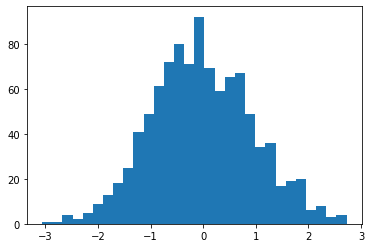

In [41]:
plt.hist(np.random.randn(1000), 30)

## Subplots

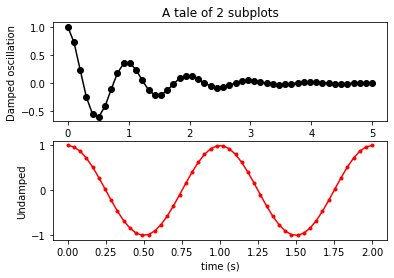

In [42]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## 3d plot

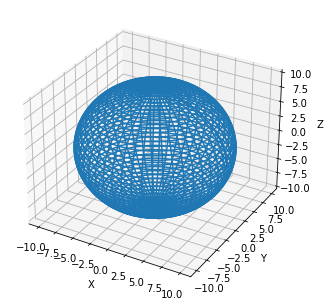

In [43]:
from numpy import *
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 100 elements
u=r_[0:2*pi:100j]
# v is an array from 0 to 2*pi, with 100 elements
v=r_[0:pi:100j]
# x, y, and z are the coordinates of the points for plotting
# each is arranged in a 100x100 array
x=10*outer(cos(u),sin(v))
y=10*outer(sin(u),sin(v))
z=10*outer(ones(size(u)),cos(v))

fig=p.figure()
ax = p3.Axes3D(fig)
ax.plot_wireframe(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
p.show()

### Bokeh example

<AxesSubplot:>

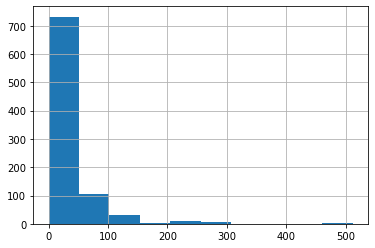

In [44]:
train.Fare.hist()

# What is Scikit Learn?

Scikit-learn is an open source machine learning library for Python.  
 - **Simple and efficient** tools for data mining and data analysis
 - Good coverage of machine learning algorithms, processes, tools and techniques
   - Classification, Regression, Clustering, Dimensionality Reduction, Model selection, Preprocessing
 - **High standards** 
 - Well-suited for applications:
   - Used for **large datasets**
   - **Building blocks** for application-specific algorithms
 - Built on **NumPy, SciPy**
 - **Open source**, Commercially usable - BSD license, Community driven

Data Representation in Scikit-learn:
 - Most algorithms expect a two-dimensional array, of shape (n_samples,n_features).
 - The arrays can be either NumPy arrays, or in some cases scipy.sparse matrices.
   - The number of features must be fixed in advance.

Design principles
 - Minimize number of object interfaces
 - Build abstractions for recurrent use cases
 - Simplicity, Simplicity, Simplicity
 
Code samples:
> 
``from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)``

Classification:
>``y_pred = model.predict(X_test)``

Filters, dimension reduction, latent variables:
>``X_new = model.transform(X_test)``

Incremental learning:
>``model.partial_fir(X_train, y_train)``

---

The [scikit-learn website](http://scikit-learn.org/stable/) has great tutorials for using their library  
---
The [preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) page has information that is very relevant for the second exercise.

A more interfactive tutorial introducing scikit-learn can be found [here](https://www.datacamp.com/community/tutorials/machine-learning-python#gs.Ae7Ua_Y).

## Now, back to the Titanic...
### Prepare the data for ML
Reminder:

In [45]:
train = pd.read_csv(train_url, header=0)
test = pd.read_csv(test_url, header=0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### "Sex" to int (binary)
> Transform to **Int** and store in a new 'Gender' columns

In [46]:
#Adding in new 'Gender' column to the dataframe
train['Gender'] = train['Sex'].map( {'female':0, 'male':1}).astype(int)
test['Gender'] = test['Sex'].map( {'female':0, 'male':1}).astype(int)

#### "Embarked" is multicategorical - Transform in two steps:
1. Transform to **categorical** and store in new 'Embarkport' columns
2. Transfom to **Int** and store in new 'EmbarkportInt' columns

In [47]:
train['Embarkport'] = train['Embarked'].astype("category")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarkport
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S


In [48]:
train['EmbarkportInt'] = train['Embarkport'].cat.rename_categories(range(train['Embarkport'].nunique())).astype('Int64')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarkport,EmbarkportInt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S,2


In [49]:
test['Embarkport'] = test['Embarked'].astype("category")
test['EmbarkportInt'] = test['Embarkport'].cat.rename_categories(range(test['Embarkport'].nunique())).astype(int)

An alternative is to convert the categorical data to one-hot representation:

In [50]:
embarked_dummies = pd.get_dummies(train['Embarkport'])
train_with_dummies = pd.concat([train, embarked_dummies], axis=1)
train_with_dummies.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarkport,EmbarkportInt,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,S,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,S,2,0,0,1


In [51]:
#Cleaning - drop the newly created columns
train = train.drop(['Embarkport','EmbarkportInt'], axis=1) 
test = test.drop(['Embarkport','EmbarkportInt'], axis=1) 

## convert non-numeric data
Identify which of the orginal features are objects

In [52]:
ObjFeat=train.keys()[train.dtypes.map(lambda x: x=='object')]

In [53]:
ObjFeat

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [54]:
name_obj = ObjFeat[3]
import copy

train2 = copy.deepcopy(train)
train2[name_obj] = train2[name_obj].astype("category")
train2[name_obj+"Int"] = train2[name_obj].cat.rename_categories(range(train[name_obj].nunique())).astype('Int64')
train2.loc[train2[name_obj].isnull(), "CabinInt"] = np.nan

pd.crosstab(train2[name_obj+"Int"], train2[name_obj], rownames=[name_obj+"Int"], colnames=[name_obj])

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
CabinInt,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [55]:
# Transform the original features to categorical
# Creat new 'int' features, resp.
for f in ObjFeat:
    train[f] = train[f].astype("category")
    train[f+"Int"] = train[f].cat.rename_categories(range(train[f].nunique())).astype('Int64')
    train.loc[train[f].isnull(), f+"Int"] = np.nan #fix NaN conversion

    # Let's creat a crosstabcross-tabulation to look at this transformation
    pd.crosstab(train[f+"Int"], train[f], rownames=[f+"Int"], colnames=[f])
        
    test[f] = test[f].astype("category")        
    if test[f].cat.categories.isin(train[f].cat.categories).all():
        test[f] = test[f].cat.rename_categories(train[f].cat.categories)
    else:    
        print("\n\nTrain and Test don't share the same set of categories in feature '", f, "'")
    test[f+"Int"] = test[f].cat.rename_categories(range(test[f].nunique())).astype('Int64')
    test.loc[test[f].isnull(), f+"Int"] = np.nan #fix NaN conversion



Train and Test don't share the same set of categories in feature ' Name '


Train and Test don't share the same set of categories in feature ' Ticket '


Train and Test don't share the same set of categories in feature ' Cabin '


## Missing Values
Age has missing values.  
Create new 'AgeFill' column, where missing value is filled with the median of the gender and Pclass

In [56]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = train[(train['Gender'] == i) & 
                              (train['Pclass'] == j+1)]['Age'].dropna().median() 

median_ages

array([[35. , 28. , 21.5],
       [40. , 30. , 25. ]])

In [57]:
train['AgeFill'] = train['Age']
test['AgeFill'] = test['Age']

# Fill the missing values with medians
for i in range(0, 2):
    for j in range(0, 3):
        train.loc[ (train.Age.isnull()) & (train.Gender == i) & (train.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
        test.loc[ (test.Age.isnull()) & (test.Gender == i) & (test.Pclass == j+1),\
                 'AgeFill'] = median_ages[i,j]

train[ train['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [58]:
# Create a feature that records whether the Age was originally missing
train['AgeIsNull'] = pd.isnull(train.Age).astype(int)
test['AgeIsNull'] = pd.isnull(test.Age).astype(int)

train[['Gender','Pclass','Age','AgeFill','AgeIsNull']].head(10)

,Gender,Pclass,Age,AgeFill,AgeIsNull
0,1,3,22.0,22.0,0
1,0,1,38.0,38.0,0
2,0,3,26.0,26.0,0
3,0,1,35.0,35.0,0
4,1,3,35.0,35.0,0
5,1,3,NaN,25.0,1
6,1,1,54.0,54.0,0
7,1,3,2.0,2.0,0
8,0,3,27.0,27.0,0
9,0,2,14.0,14.0,0


## Scaling

In [59]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train['AgeFill0-1'] = min_max_scaler.fit_transform(train['AgeFill'].values.reshape(-1, 1))
test['AgeFill0-1'] = min_max_scaler.fit_transform(test['AgeFill'].values.reshape(-1, 1))
train[['Gender','Pclass','Age','AgeFill','AgeFill0-1','AgeIsNull']].head()

,Gender,Pclass,Age,AgeFill,AgeFill0-1,AgeIsNull
0,1,3,22.0,22.0,0.271174,0
1,0,1,38.0,38.0,0.472229,0
2,0,3,26.0,26.0,0.321438,0
3,0,1,35.0,35.0,0.434531,0
4,1,3,35.0,35.0,0.434531,0


In [60]:
train.drop('AgeFill', axis=1);

## Feature Construction
Parch is the number of parents or children onboard, 
and SibSp is the number of siblings or spouses. 
> We can aggregate them together to form a new 'FamilySize' 

In [61]:
train['FamilySize'] = train.SibSp + train.Parch
test['FamilySize'] = test.SibSp + test.Parch

Pclass had a large effect on survival, and it's possible Age will too.
>A Constructed feature is the Age and Pclass multiplication, thus amplifying 
old age and 3rd class - both were less likely to survive

<AxesSubplot:>

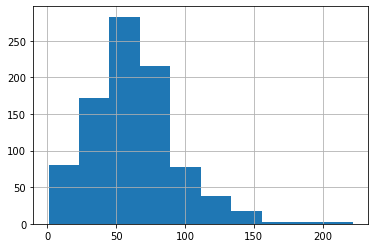

In [62]:
train['Age*Class'] = train.AgeFill * train.Pclass
test['Age*Class'] = test.AgeFill * test.Pclass

train['Age*Class'].hist()

## Final Preperations

In [63]:
# categorical columns
train.dtypes[ObjFeat]
test.dtypes[ObjFeat]

Name        category
Sex         category
Ticket      category
Cabin       category
Embarked    category
dtype: object

#### Drop the columns that will not be used in training

In [64]:
train = train.drop(ObjFeat, axis=1) 
test = test.drop(ObjFeat, axis=1) 

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Gender           int32
NameInt          Int64
SexInt           Int64
TicketInt        Int64
CabinInt         Int64
EmbarkedInt      Int64
AgeFill        float64
AgeIsNull        int32
AgeFill0-1     float64
FamilySize       int64
Age*Class      float64
dtype: object

#### Create training and testing sets that have no null (by dropping rows ) 

In [65]:
train_noNaN = train.dropna()
test_noNaN = test.dropna()

train_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Age          183 non-null    float64
 4   SibSp        183 non-null    int64  
 5   Parch        183 non-null    int64  
 6   Fare         183 non-null    float64
 7   Gender       183 non-null    int32  
 8   NameInt      183 non-null    Int64  
 9   SexInt       183 non-null    Int64  
 10  TicketInt    183 non-null    Int64  
 11  CabinInt     183 non-null    Int64  
 12  EmbarkedInt  183 non-null    Int64  
 13  AgeFill      183 non-null    float64
 14  AgeIsNull    183 non-null    int32  
 15  AgeFill0-1   183 non-null    float64
 16  FamilySize   183 non-null    int64  
 17  Age*Class    183 non-null    float64
dtypes: Int64(5), float64(5), int32(2), int64(6)
memory

In [66]:
test_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Age          87 non-null     float64
 3   SibSp        87 non-null     int64  
 4   Parch        87 non-null     int64  
 5   Fare         87 non-null     float64
 6   Gender       87 non-null     int32  
 7   NameInt      87 non-null     Int64  
 8   SexInt       87 non-null     Int64  
 9   TicketInt    87 non-null     Int64  
 10  CabinInt     87 non-null     Int64  
 11  EmbarkedInt  87 non-null     Int64  
 12  AgeFill      87 non-null     float64
 13  AgeIsNull    87 non-null     int32  
 14  AgeFill0-1   87 non-null     float64
 15  FamilySize   87 non-null     int64  
 16  Age*Class    87 non-null     float64
dtypes: Int64(5), float64(5), int32(2), int64(5)
memory usage: 12.0 KB


#### Convert to Numpy array

In [67]:
train_data_X = train.drop(['Survived'], axis=1).values
train_data_Y = train.Survived.values
test_data = test.values

train_data_X_noNaN = train_noNaN.drop(['Survived'], axis=1).values
train_data_Y_noNaN = train_noNaN.Survived.values
test_data_noNaN = test_noNaN.values

## Feature selection example

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

univariate_filter = SelectKBest(mutual_info_classif, k=4).fit(train_data_X_noNaN, train_data_Y_noNaN)

univariate_filter.transform(train_data_X_noNaN)
univariate_filter.transform(test_data_noNaN);

## Training Random Forest Classifier

In [69]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Prepare train and test data using cross validation
X_train_noNaN, X_test_noNaN, y_train_noNaN, y_test_noNaN = train_test_split(train_data_X_noNaN, 
                                                                            train_data_Y_noNaN) 
                                                                            

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 3)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(X_train_noNaN, y_train_noNaN)

# output = forest.predict(test_data_noNaN)
y_pred_noNaN = forest.predict(X_test_noNaN)

print('accuracy:', metrics.accuracy_score(y_test_noNaN, y_pred_noNaN))
print('precision:', metrics.precision_score(y_test_noNaN, y_pred_noNaN))
print('recall:', metrics.recall_score(y_test_noNaN, y_pred_noNaN))
print('f1 score:', metrics.f1_score(y_test_noNaN, y_pred_noNaN))

accuracy: 0.782608695652174
precision: 0.9285714285714286
recall: 0.7647058823529411
f1 score: 0.8387096774193549


## TODO: Implement the following

## SVM

In [78]:
from sklearn.svm import SVC

# TODO: train a SVM classifier:
# y_pred_noNaN = ???


clf = SVC(kernel='linear') # Linear Kernel
clf.fit(X_train_noNaN, y_train_noNaN)

y_pred_noNaN = clf.predict(X_test_noNaN)


print('accuracy:', metrics.accuracy_score(y_test_noNaN, y_pred_noNaN))
print('precision:', metrics.precision_score(y_test_noNaN, y_pred_noNaN))
print('recall:', metrics.recall_score(y_test_noNaN, y_pred_noNaN))
print('f1 score:', metrics.f1_score(y_test_noNaN, y_pred_noNaN))

accuracy: 0.8478260869565217
precision: 0.9354838709677419
recall: 0.8529411764705882
f1 score: 0.8923076923076922
